<a href="https://colab.research.google.com/github/auliaacahyaa/PCVK/blob/main/PCVK_KUIS_2_Kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Kelompok 4 :**

1. Afdhol Affanuddin (2141720253)
2. Andhito Galih Nur Cahyo (2141720138)
3. Aulia Cahya Briliana (2141720092)

**KUIS 2**

1. Mengerjakan secara kelompok yang terdiri dari 3 anggota
2. Kumpulkan e-ktp anggota keluarga pada kelompok minimal 10 buah sebagai dataset.
3. Deteksi dan kenali foto wajah e-ktp tersebut menggunakan metode yang telah dipelajari baik pada matakulilah PCVK ataupun matakuliah lain pada semester ini.
4. Presentasikan di depan kelas hasil dari pekerjaan kelompok Anda, paparkan hasil dari pekerjaan tersebut secara detail lengkap dengan tangkapan layar bagian dari: (1)pre-processing, (2)lokalisasi, (3)segmentasi, dan (4)pengenalan.
5. Jangan lupa upload juga kode program tersebut pada repository
6. Kumpulkan link file presentasi dalam bentuk pdf dan link repository.

### **Import Folder dan Import Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

### **PRE-PROCESSING**

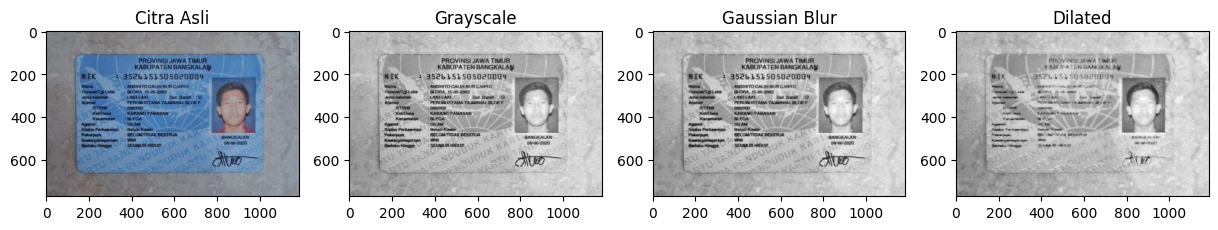

In [ ]:
# Fungsi pre-processing untuk KTP
def preprocess_ktp(image_path):
    # Baca gambar KTP
    ktp_img = cv2.imread(image_path)

    # Ubah ke citra grayscale
    ktp_gray = cv2.cvtColor(ktp_img, cv2.COLOR_BGR2GRAY)

    # Terapkan filter Gaussian blur untuk mengurangi noise
    ktp_blurred = cv2.GaussianBlur(ktp_gray, (5, 5), 0)

    # Terapkan operasi morfologi (dilasi) untuk menghubungkan area yang berdekatan
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
    ktp_dilated = cv2.dilate(ktp_blurred, kernel, iterations=1)

    return ktp_img, ktp_gray, ktp_blurred, ktp_dilated

# Path foto KTP
ktp_image_path = "/content/drive/MyDrive/PCVK/Kuis2/KTP3.jpg"

# Jalankan pre-processing
ktp_original, ktp_gray, ktp_blurred, ktp_dilated = preprocess_ktp(ktp_image_path)

# Tampilkan hasil pre-processing
plt.figure(figsize=(15, 5))

plt.subplot(141), plt.imshow(cv2.cvtColor(ktp_original, cv2.COLOR_BGR2RGB)), plt.title('Citra Asli')
plt.subplot(142), plt.imshow(ktp_gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(143), plt.imshow(ktp_blurred, cmap='gray'), plt.title('Gaussian Blur')
plt.subplot(144), plt.imshow(ktp_dilated, cmap='gray'), plt.title('Dilated')

plt.show()

### **LOKALISASI**

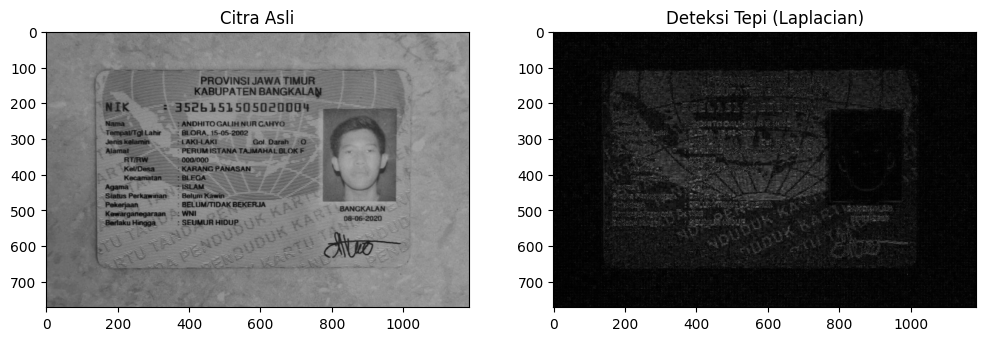

In [ ]:
def localize_edges(image_path):
    # Baca gambar dari path
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Terapkan filter Laplacian
    edges = cv2.Laplacian(image, cv2.CV_64F)

    # Ambil nilai absolut
    edges = cv2.convertScaleAbs(edges)

    # Tampilkan gambar asli dan hasil deteksi tepi bersebelahan
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Deteksi Tepi (Laplacian)')

    plt.show()

# Path foto KTP
ktp_image_path = "/content/drive/MyDrive/PCVK/Kuis2/KTP3.jpg"

# Jalankan program
localize_edges(ktp_image_path)

### **SEGMENTASI**

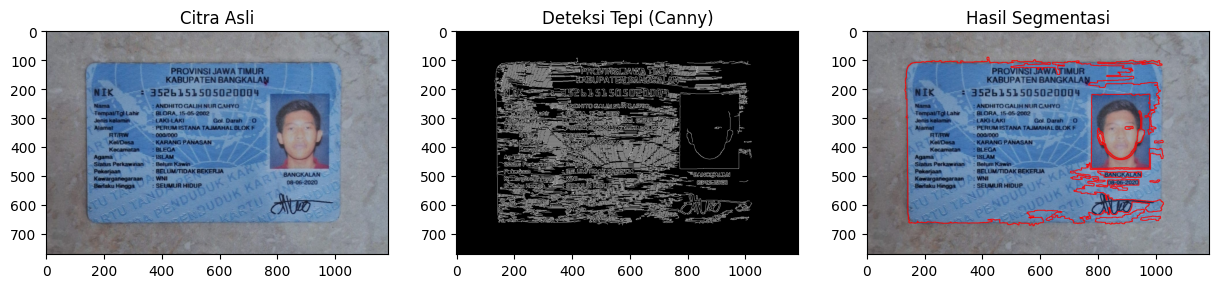

In [ ]:
# Baca gambar KTP
img_path = "/content/drive/MyDrive/PCVK/Kuis2/KTP3.jpg"
img = cv2.imread(img_path)

# Ubah ke citra grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Terapkan Canny edge detection
edges = cv2.Canny(img_gray, 30, 200)

# Aplikasikan teknik dilasi untuk menyatukan tepi yang saling berdekatan
dilated_edges = cv2.dilate(edges, None, iterations=2)

# Temukan kontur pada gambar hasil dilasi
contours, hierarchy = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Buat citra hasil segmentasi dengan warna merah pada tepi KTP
segmentation_result = img.copy()
cv2.drawContours(segmentation_result, contours, -1, (0, 0, 255), 2)

# Tampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Citra Asli')
plt.subplot(132), plt.imshow(edges, cmap='gray'), plt.title('Deteksi Tepi (Canny)')
plt.subplot(133), plt.imshow(cv2.cvtColor(segmentation_result, cv2.COLOR_BGR2RGB)), plt.title('Hasil Segmentasi')
plt.show()

### **FACE DETECTION**

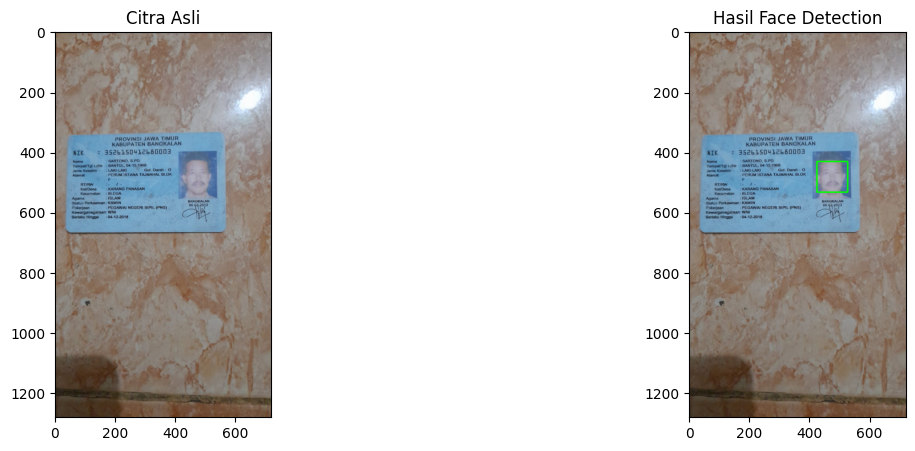

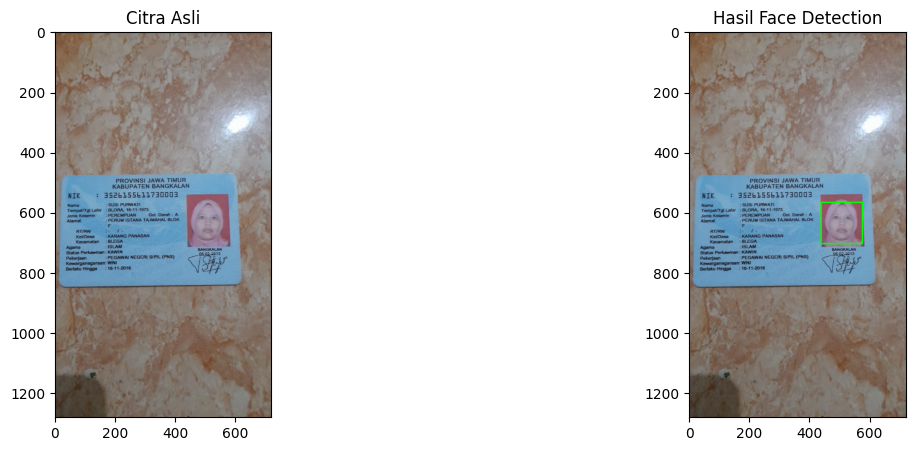

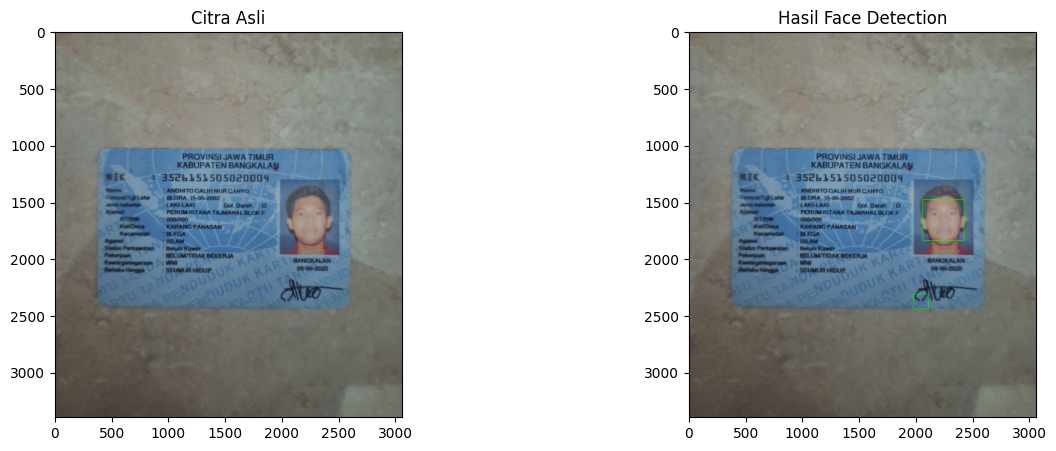

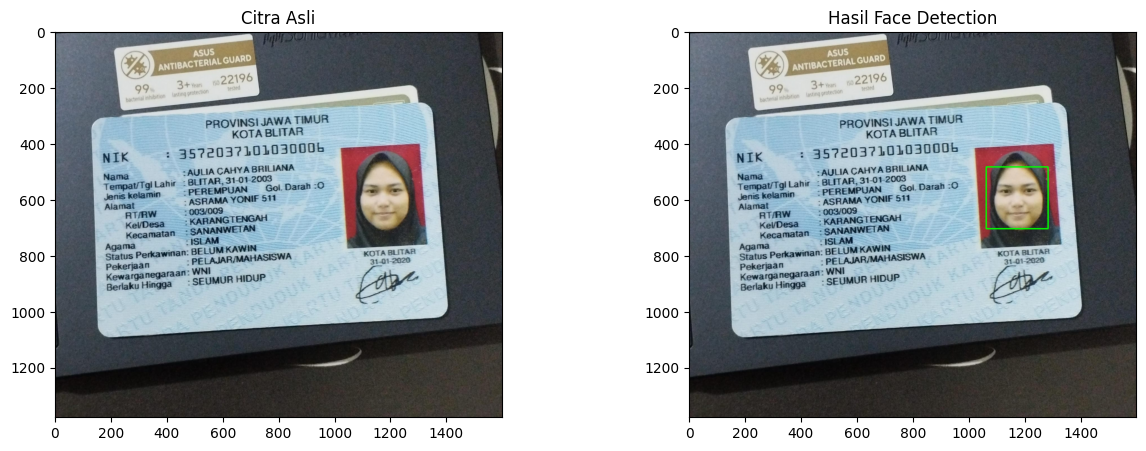

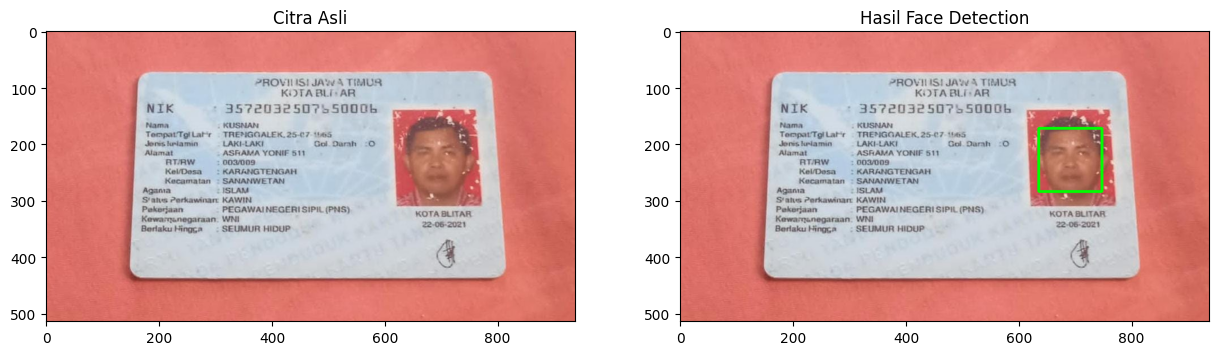

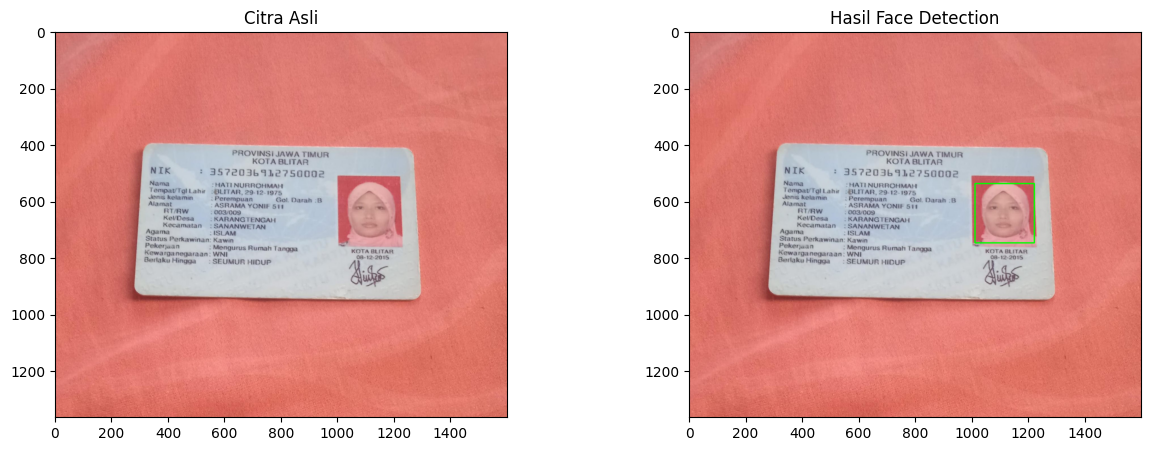

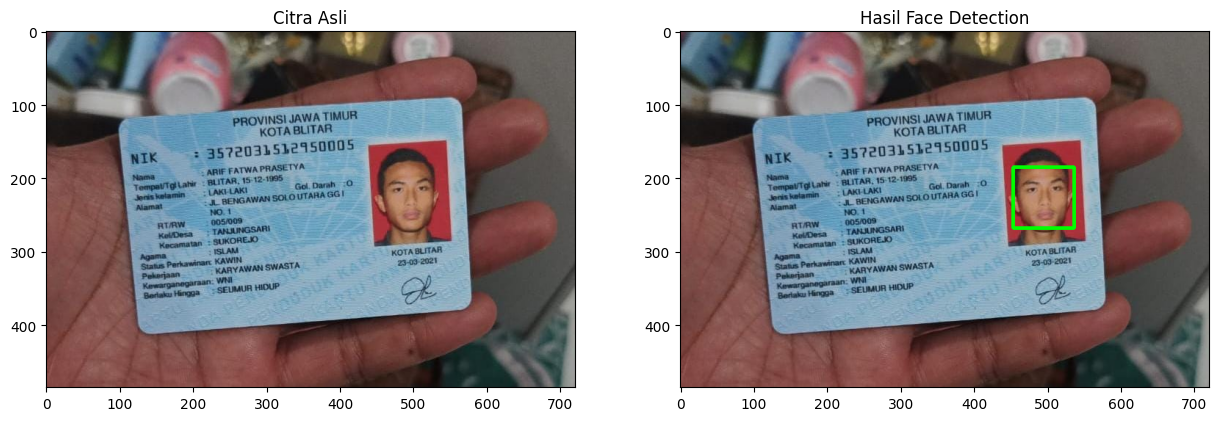

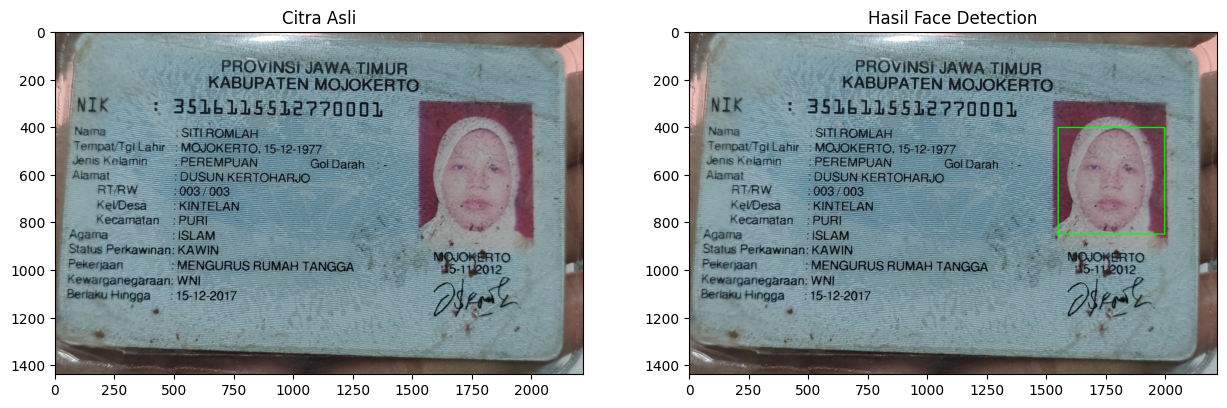

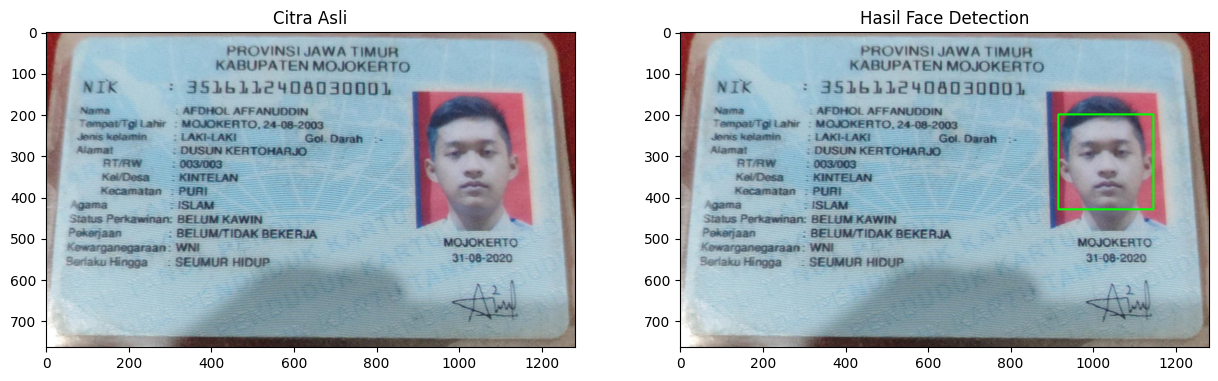

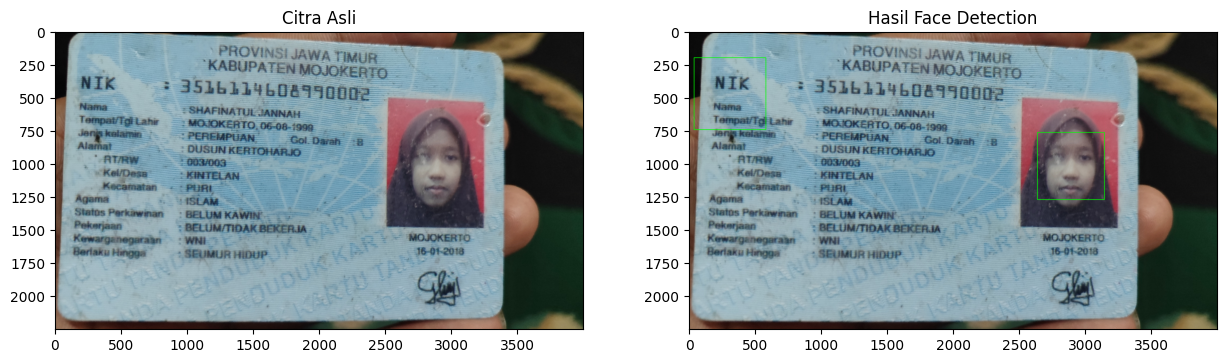

In [ ]:
# Inisialisasi cascade classifier untuk deteksi wajah
cascade_wajah = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

def proses_ktp(file_path):
    ktp = cv.imread(file_path)
    ktp_copy = ktp.copy()

    # Ubah gambar menjadi grayscale untuk meningkatkan kecepatan deteksi
    gray_ktp = cv.cvtColor(ktp_copy, cv.COLOR_BGR2GRAY)

    # Deteksi wajah pada gambar grayscale
    roi_wajah = cascade_wajah.detectMultiScale(gray_ktp, scaleFactor=1.1, minNeighbors=8, minSize=(50, 50))

    # Fokus hanya pada objek wajah
    for (x, y, w, h) in roi_wajah:
        roi_wajah_copy = ktp_copy[y:y+h, x:x+w]
        cv.rectangle(ktp, (x, y), (x+w, y+h), (0, 255, 0), 3)

    return ktp_copy, ktp

# Daftar file KTP
file_paths = [
    '/content/drive/MyDrive/PCVK/Kuis2/KTP1.jpg',
    '/content/drive/MyDrive/PCVK/Kuis2/KTP2.jpg',
    '/content/drive/MyDrive/PCVK/Kuis2/KTP3.jpg',
    '/content/drive/MyDrive/PCVK/Kuis2/KTP4.jpg',
    '/content/drive/MyDrive/PCVK/Kuis2/KTP5.jpg',
    '/content/drive/MyDrive/PCVK/Kuis2/KTP6.jpg',
    '/content/drive/MyDrive/PCVK/Kuis2/KTP7.jpg',
    '/content/drive/MyDrive/PCVK/Kuis2/KTP8.jpg',
    '/content/drive/MyDrive/PCVK/Kuis2/KTP9.jpg',
    '/content/drive/MyDrive/PCVK/Kuis2/KTP10.jpg',
    # tambahkan file KTP lainnya jika diperlukan
]

# Proses setiap file KTP
for i, file_path in enumerate(file_paths):
    ktp_original, ktp_with_faces = proses_ktp(file_path)

    # Tampilkan hasil
    f, axarr = plt.subplots(1, 2, figsize=(15, 5))
    axarr[0].imshow(cv.cvtColor(ktp_original, cv.COLOR_BGR2RGB))
    axarr[0].set_title('Citra Asli')

    axarr[1].imshow(cv.cvtColor(ktp_with_faces, cv.COLOR_BGR2RGB))
    axarr[1].set_title('Hasil Face Detection')

    plt.show()